# Data Mining Final Project(Upmost Team)


### Team Members -

#### Rakesh Vejandla
#### Ojeswini Sesi Priya Kalidindi
#### Rahul Rawat
#### Meghana Rudra Raju


In this Project, we will be performing KNN, Decision tree, Hyperparameter Tuning with KNN and Decision Tree, Random Forest, ADA Boost, XG Boost, Gradient Boost, Logistic Regression, Multi Layer Perception models and compare the metrics of all the models, which results in more information about the performances of the model, which provides the better performance either with tuning or normal models

#### import libraries and packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as pltB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

#### Description of Data set

the information is related to classification of post operative life expectancy of Thoraric Surgery patients where the
Outcome results as binary classification where the values are True- if died, False - if Survived

In [3]:
#loading the data set in the csv format
#add the path of the csv file from your local computer
thoraric_df = pd.read_csv('/Users/rakeshvejandla/Downloads/ThoraricSurgery.csv')
thoraric_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rakeshvejandla/Downloads/ThoraricSurgery.csv'

In [3]:
thoraric_df.shape

(470, 17)

In [4]:
thoraric_df.columns

Index(['DGN', 'FVC', 'Volume_Ex', 'Performance', 'Pain_BS', 'Haemoptysis_BS',
       'Dyspnoea_BS', 'Cough_BS', 'Weakness_BS', 'Tumour_Size', 'Diabetes_T2',
       'HA_6', 'PAD', 'Smoking', 'Asthma', 'AGE', 'Risk1Y'],
      dtype='object')

In [5]:
thoraric_df.describe()

,FVC,Volume_Ex,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


In [6]:
thoraric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DGN             470 non-null    object 
 1   FVC             470 non-null    float64
 2   Volume_Ex       470 non-null    float64
 3   Performance     470 non-null    object 
 4   Pain_BS         470 non-null    object 
 5   Haemoptysis_BS  470 non-null    object 
 6   Dyspnoea_BS     470 non-null    object 
 7   Cough_BS        470 non-null    object 
 8   Weakness_BS     470 non-null    object 
 9   Tumour_Size     470 non-null    object 
 10  Diabetes_T2     470 non-null    object 
 11  HA_6            470 non-null    object 
 12  PAD             470 non-null    object 
 13  Smoking         470 non-null    object 
 14  Asthma          470 non-null    object 
 15  AGE             470 non-null    int64  
 16  Risk1Y          470 non-null    object 
dtypes: float64(2), int64(1), object(14)

In [7]:
#converting column names to upper
thoraric_df.columns = [s.strip().upper().replace('.', '_') for s in thoraric_df.columns]

In [8]:
thoraric_df.dtypes

DGN                object
FVC               float64
VOLUME_EX         float64
PERFORMANCE        object
PAIN_BS            object
HAEMOPTYSIS_BS     object
DYSPNOEA_BS        object
COUGH_BS           object
WEAKNESS_BS        object
TUMOUR_SIZE        object
DIABETES_T2        object
HA_6               object
PAD                object
SMOKING            object
ASTHMA             object
AGE                 int64
RISK1Y             object
dtype: object

#### Converting object types to Categories

In [9]:
for col in ['DGN', 'PERFORMANCE', 'TUMOUR_SIZE']:
    thoraric_df[col] = thoraric_df[col].astype('category')    

In [10]:
thoraric_df.dtypes

DGN               category
FVC                float64
VOLUME_EX          float64
PERFORMANCE       category
PAIN_BS             object
HAEMOPTYSIS_BS      object
DYSPNOEA_BS         object
COUGH_BS            object
WEAKNESS_BS         object
TUMOUR_SIZE       category
DIABETES_T2         object
HA_6                object
PAD                 object
SMOKING             object
ASTHMA              object
AGE                  int64
RISK1Y              object
dtype: object

In [70]:
thoraric_df.isnull().sum()

DGN               0
FVC               0
VOLUME_EX         0
PERFORMANCE       0
PAIN_BS           0
HAEMOPTYSIS_BS    0
DYSPNOEA_BS       0
COUGH_BS          0
WEAKNESS_BS       0
TUMOUR_SIZE       0
DIABETES_T2       0
HA_6              0
PAD               0
SMOKING           0
ASTHMA            0
AGE               0
RISK1Y            0
dtype: int64

#### Ordinal Encoding

Though some models can able to handle both numerical and categorical data, the scikit-learn implementation does not support categorical variables for now. Therefore, instead of categorical change values to numeric.

In [71]:
enc = OrdinalEncoder()
thoraric_df.DGN = enc.fit_transform(thoraric_df[['DGN']])
thoraric_df.PERFORMANCE = enc.fit_transform(thoraric_df[['PERFORMANCE']])
thoraric_df.TUMOUR_SIZE = enc.fit_transform(thoraric_df[['TUMOUR_SIZE']])
thoraric_df.head(20)

,DGN,FVC,VOLUME_EX,PERFORMANCE,PAIN_BS,HAEMOPTYSIS_BS,DYSPNOEA_BS,COUGH_BS,WEAKNESS_BS,TUMOUR_SIZE,DIABETES_T2,HA_6,PAD,SMOKING,ASTHMA,AGE,RISK1Y
0,1.0,2.88,2.16,1.0,0,0,0,1,1,3.0,0,0,0,1,0,60,0
1,2.0,3.40,1.88,0.0,0,0,0,0,0,1.0,0,0,0,1,0,51,0
2,2.0,2.76,2.08,1.0,0,0,0,1,0,0.0,0,0,0,1,0,59,0
3,2.0,3.68,3.04,0.0,0,0,0,0,0,0.0,0,0,0,0,0,54,0
4,2.0,2.44,0.96,2.0,0,1,0,1,1,0.0,0,0,0,1,0,73,1
5,2.0,2.48,1.88,1.0,0,0,0,1,0,0.0,0,0,0,0,0,51,0
6,2.0,4.36,3.28,1.0,0,0,0,1,0,1.0,1,0,0,1,0,59,1
7,1.0,3.19,2.50,1.0,0,0,0,1,0,0.0,0,0,1,1,0,66,1
8,2.0,3.16,2.64,2.0,0,0,0,1,1,0.0,0,0,0,1,0,68,0
9,2.0,2.32,2.16,1.0,0,0,0,1,0,0.0,0,0,0,1,0,54,0


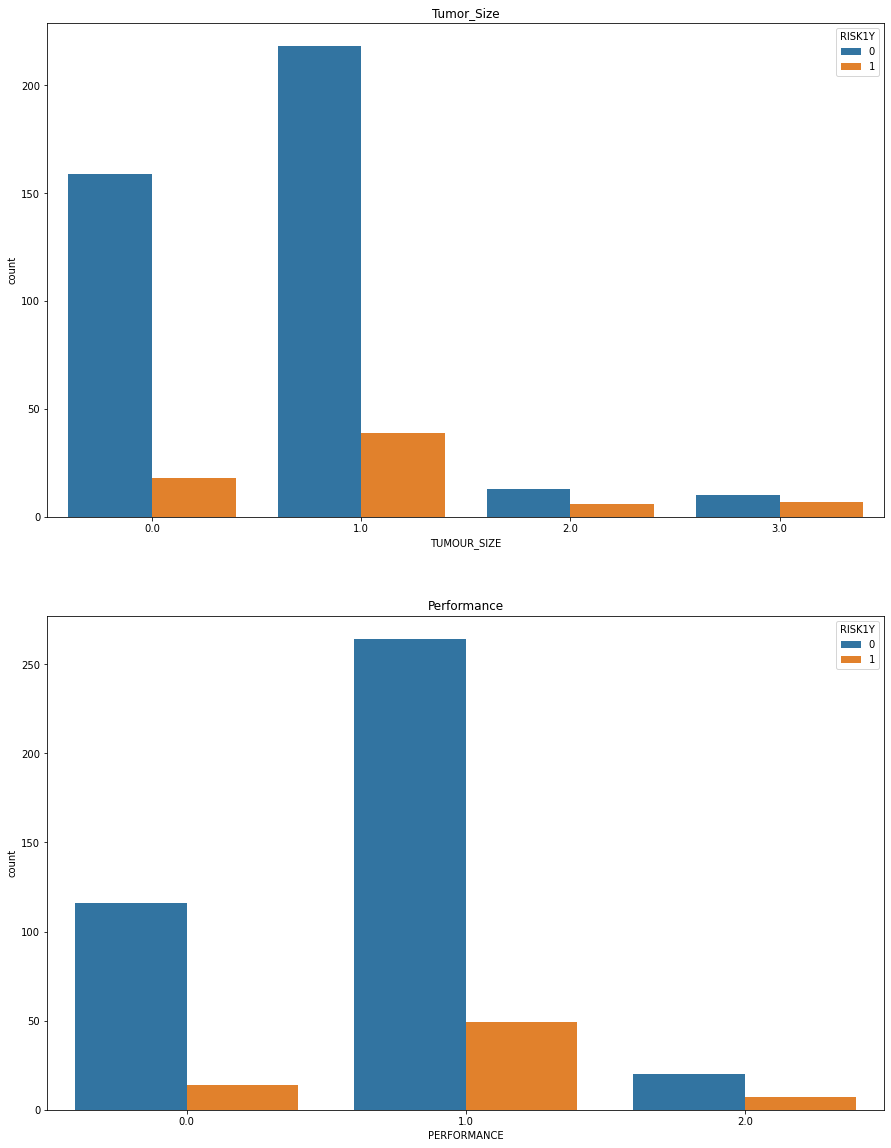

In [73]:
fig, axes = plt.subplots(2,1,figsize=(15,20))

sns.countplot(x='TUMOUR_SIZE', hue='RISK1Y', data=thoraric_df, ax=axes[0]).set_title('Tumor_Size')
sns.countplot(x='PERFORMANCE', hue='RISK1Y', data=thoraric_df, ax=axes[1]).set_title('Performance')

plt.show()

Transform our predictors into integers. This is necessary if we later want to test precision and recall. 

In [14]:
# construct datasets for analysis
target = 'RISK1Y'
predictors = list(thoraric_df.columns)
predictors.remove(target)

enc = LabelEncoder() 
for col in ['PAIN_BS','HAEMOPTYSIS_BS','DYSPNOEA_BS','COUGH_BS','WEAKNESS_BS','DIABETES_T2','HA_6','PAD','SMOKING','ASTHMA','RISK1Y']:
    thoraric_df[col]=enc.fit_transform(thoraric_df[col])

In [15]:
X = thoraric_df[predictors]
y = thoraric_df[target]

In [16]:
thoraric_df.dtypes

DGN               float64
FVC               float64
VOLUME_EX         float64
PERFORMANCE       float64
PAIN_BS             int64
HAEMOPTYSIS_BS      int64
DYSPNOEA_BS         int64
COUGH_BS            int64
WEAKNESS_BS         int64
TUMOUR_SIZE       float64
DIABETES_T2         int64
HA_6                int64
PAD                 int64
SMOKING             int64
ASTHMA              int64
AGE                 int64
RISK1Y              int64
dtype: object

### Split data into training and validation sets

Create the training set and the test set with a 70/30 split.
We've decided to use a train/test split of the dta at 70% training and 30% testing.This is same with the general practise upto small to medium data set.

In [17]:
# split the data into validation and training set into 70/30

train_X,test_X,train_Y,test_Y = train_test_split(thoraric_df, y, test_size=0.3, random_state=1)
train_X.head(5)
train_Y.value_counts()

0    283
1     46
Name: RISK1Y, dtype: int64

as we can see the data imbalance over here, we are doing over sampling method by randomly duplicating the
minority class table values

In [18]:
ros = RandomOverSampler(random_state=1)
train_X, train_y = ros.fit_resample(train_X, train_Y)
train_y.value_counts()

0    283
1    283
Name: RISK1Y, dtype: int64

In [19]:
train_X.shape

(566, 17)

## Transform Predictors

K-nn models are sensitive to differences in scale; therefore, we should begin by eliminating any differences in scale between the predictors/features. To accomplish this, we will standardize the values of each variable.

We will use the popular sklearn library's 'standard scaler' to accomplish this. This library contains many of the common functions we require when conducting analytics. The standard scaler function will standardize our variables. To achieve this, we will first need to train the scaler on the training data and then apply this trained scaler to standardize both the training and validation sets. 

In [20]:
target = 'RISK1Y'

predictors = list(thoraric_df.columns)
predictors.remove(target)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_X[predictors])

# Transform the predictors of training and validation sets
train_predictors = scaler.transform(train_X[predictors]) # train_predictors is not a numpy array
train_target = train_X[target] # train_target is now a series object

validation_predictors = scaler.transform(test_X[predictors]) # validation_target is now a series object
validation_target = test_X[target] # validation_target is now a series object

In [21]:
train_predictors.shape

(566, 16)

In [22]:
train_target.shape

(566,)

## Train a K-NN model

You've heard that a good starting point in determining a k value is to try the square root of the total observations. Since there are 470 observations, following this rule of thumb, we would select a k value of 22  (but it's best to choose an odd number so that we will use k=23).



In [23]:
knn = KNeighborsClassifier(n_neighbors=23,  metric='euclidean') # user euclidean distance

knn.fit(train_predictors, train_target)
knn_prediction_output = knn.predict(validation_predictors)
knn_prediction_output[:100]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [24]:
#knn_predict_proba_output = knn.predict_proba(validation_predictors)
#knn_predict_proba_output[:100, 1].round(2)

array([0.26, 0.61, 0.39, 0.43, 0.  , 0.57, 0.35, 0.35, 0.17, 0.09, 0.61,
       0.39, 0.39, 0.61, 0.26, 0.43, 0.35, 0.48, 0.22, 0.  , 0.3 , 0.  ,
       0.57, 0.7 , 0.52, 0.52, 0.7 , 0.  , 0.57, 0.  , 0.7 , 0.22, 0.35,
       0.35, 0.3 , 0.65, 0.65, 0.  , 0.52, 0.22, 0.52, 0.  , 0.52, 0.  ,
       0.  , 0.61, 0.13, 0.22, 0.39, 0.61, 0.48, 0.43, 0.  , 0.39, 0.13,
       0.13, 0.74, 0.61, 0.13, 0.7 , 0.74, 0.43, 0.  , 0.22, 0.26, 0.61,
       0.61, 0.74, 0.35, 0.7 , 0.3 , 0.  , 0.74, 0.52, 0.  , 0.74, 0.57,
       0.57, 0.61, 0.61, 0.52, 0.13, 0.  , 0.22, 0.48, 0.74, 0.  , 0.3 ,
       0.3 , 0.  , 0.74, 0.61, 0.78, 0.22, 0.65, 0.17, 0.26, 0.17, 0.61,
       0.48])

In [25]:
#unique, counts = np.unique(knn_prediction_output, return_counts=True)
#dict(zip(unique, counts))

{0: 85, 1: 56}

In [26]:
from sklearn.metrics import confusion_matrix
    
confusion = confusion_matrix(validation_target, knn_prediction_output)

In [74]:
confusion

array([[75, 42],
       [10, 14]])

If there are more False Negatives in this model, the model has a significant impact. The model will work well if there are more False Positives.
We must develop recall if False Positives are preferred over False Negatives. we must develop precision if False Negatives are preferred over False Positives

In [28]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

#### Precision

In [30]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.2500


#### Recall

In [31]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.5833




### Predicting the decision tree

The decision tree classifier builds a decision tree to produce the classification model.Each node in the tree denotes a test on an attribute, and each branch descending from that node stands for one of the property's potential values. Each leaf stands for a class label related to the instance. According to the results of the tests along the path, instances in the training set are categorised by moving them from the tree's root all the way down to a leaf.

In [32]:
target = 'RISK1Y'
predictors = ['DGN', 'PERFORMANCE', 'TUMOUR_SIZE','PAIN_BS','HAEMOPTYSIS_BS','DYSPNOEA_BS','COUGH_BS','WEAKNESS_BS','DIABETES_T2','HA_6','PAD','SMOKING','ASTHMA']
X = thoraric_df[predictors]
y = thoraric_df[target]

In [33]:
X.head()

,DGN,PERFORMANCE,TUMOUR_SIZE,PAIN_BS,HAEMOPTYSIS_BS,DYSPNOEA_BS,COUGH_BS,WEAKNESS_BS,DIABETES_T2,HA_6,PAD,SMOKING,ASTHMA
0,1.0,1.0,3.0,0,0,0,1,1,0,0,0,1,0
1,2.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0
2,2.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0
3,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,0.0,0,1,0,1,1,0,0,0,1,0


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: RISK1Y, dtype: int64

### Split data into training and validation sets

In [75]:
train_X, test_X, train_Y, test_Y = train_test_split(X,y, test_size=0.3, random_state=1)

In [76]:
ros = RandomOverSampler(random_state=1)
train_X, train_y = ros.fit_resample(train_X, train_Y)
train_y.value_counts()

0    283
1    283
Name: RISK1Y, dtype: int64

In [77]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(train_X, train_y)


DecisionTreeClassifier(random_state=1)

In [78]:
#performance of the model on the validation/test data
validation_predictions = dtree.predict(test_X)

print('Confusion Matrix:\n ', confusion_matrix(test_Y, validation_predictions))
print('Accuracy score:\n', accuracy_score(test_Y, validation_predictions))
print('Precision score:\n', precision_score(test_Y, validation_predictions))
print('Recall score:\n', recall_score(test_Y, validation_predictions))

Confusion Matrix:
  [[75 42]
 [14 10]]
Accuracy score:
 0.6028368794326241
Precision score:
 0.19230769230769232
Recall score:
 0.4166666666666667


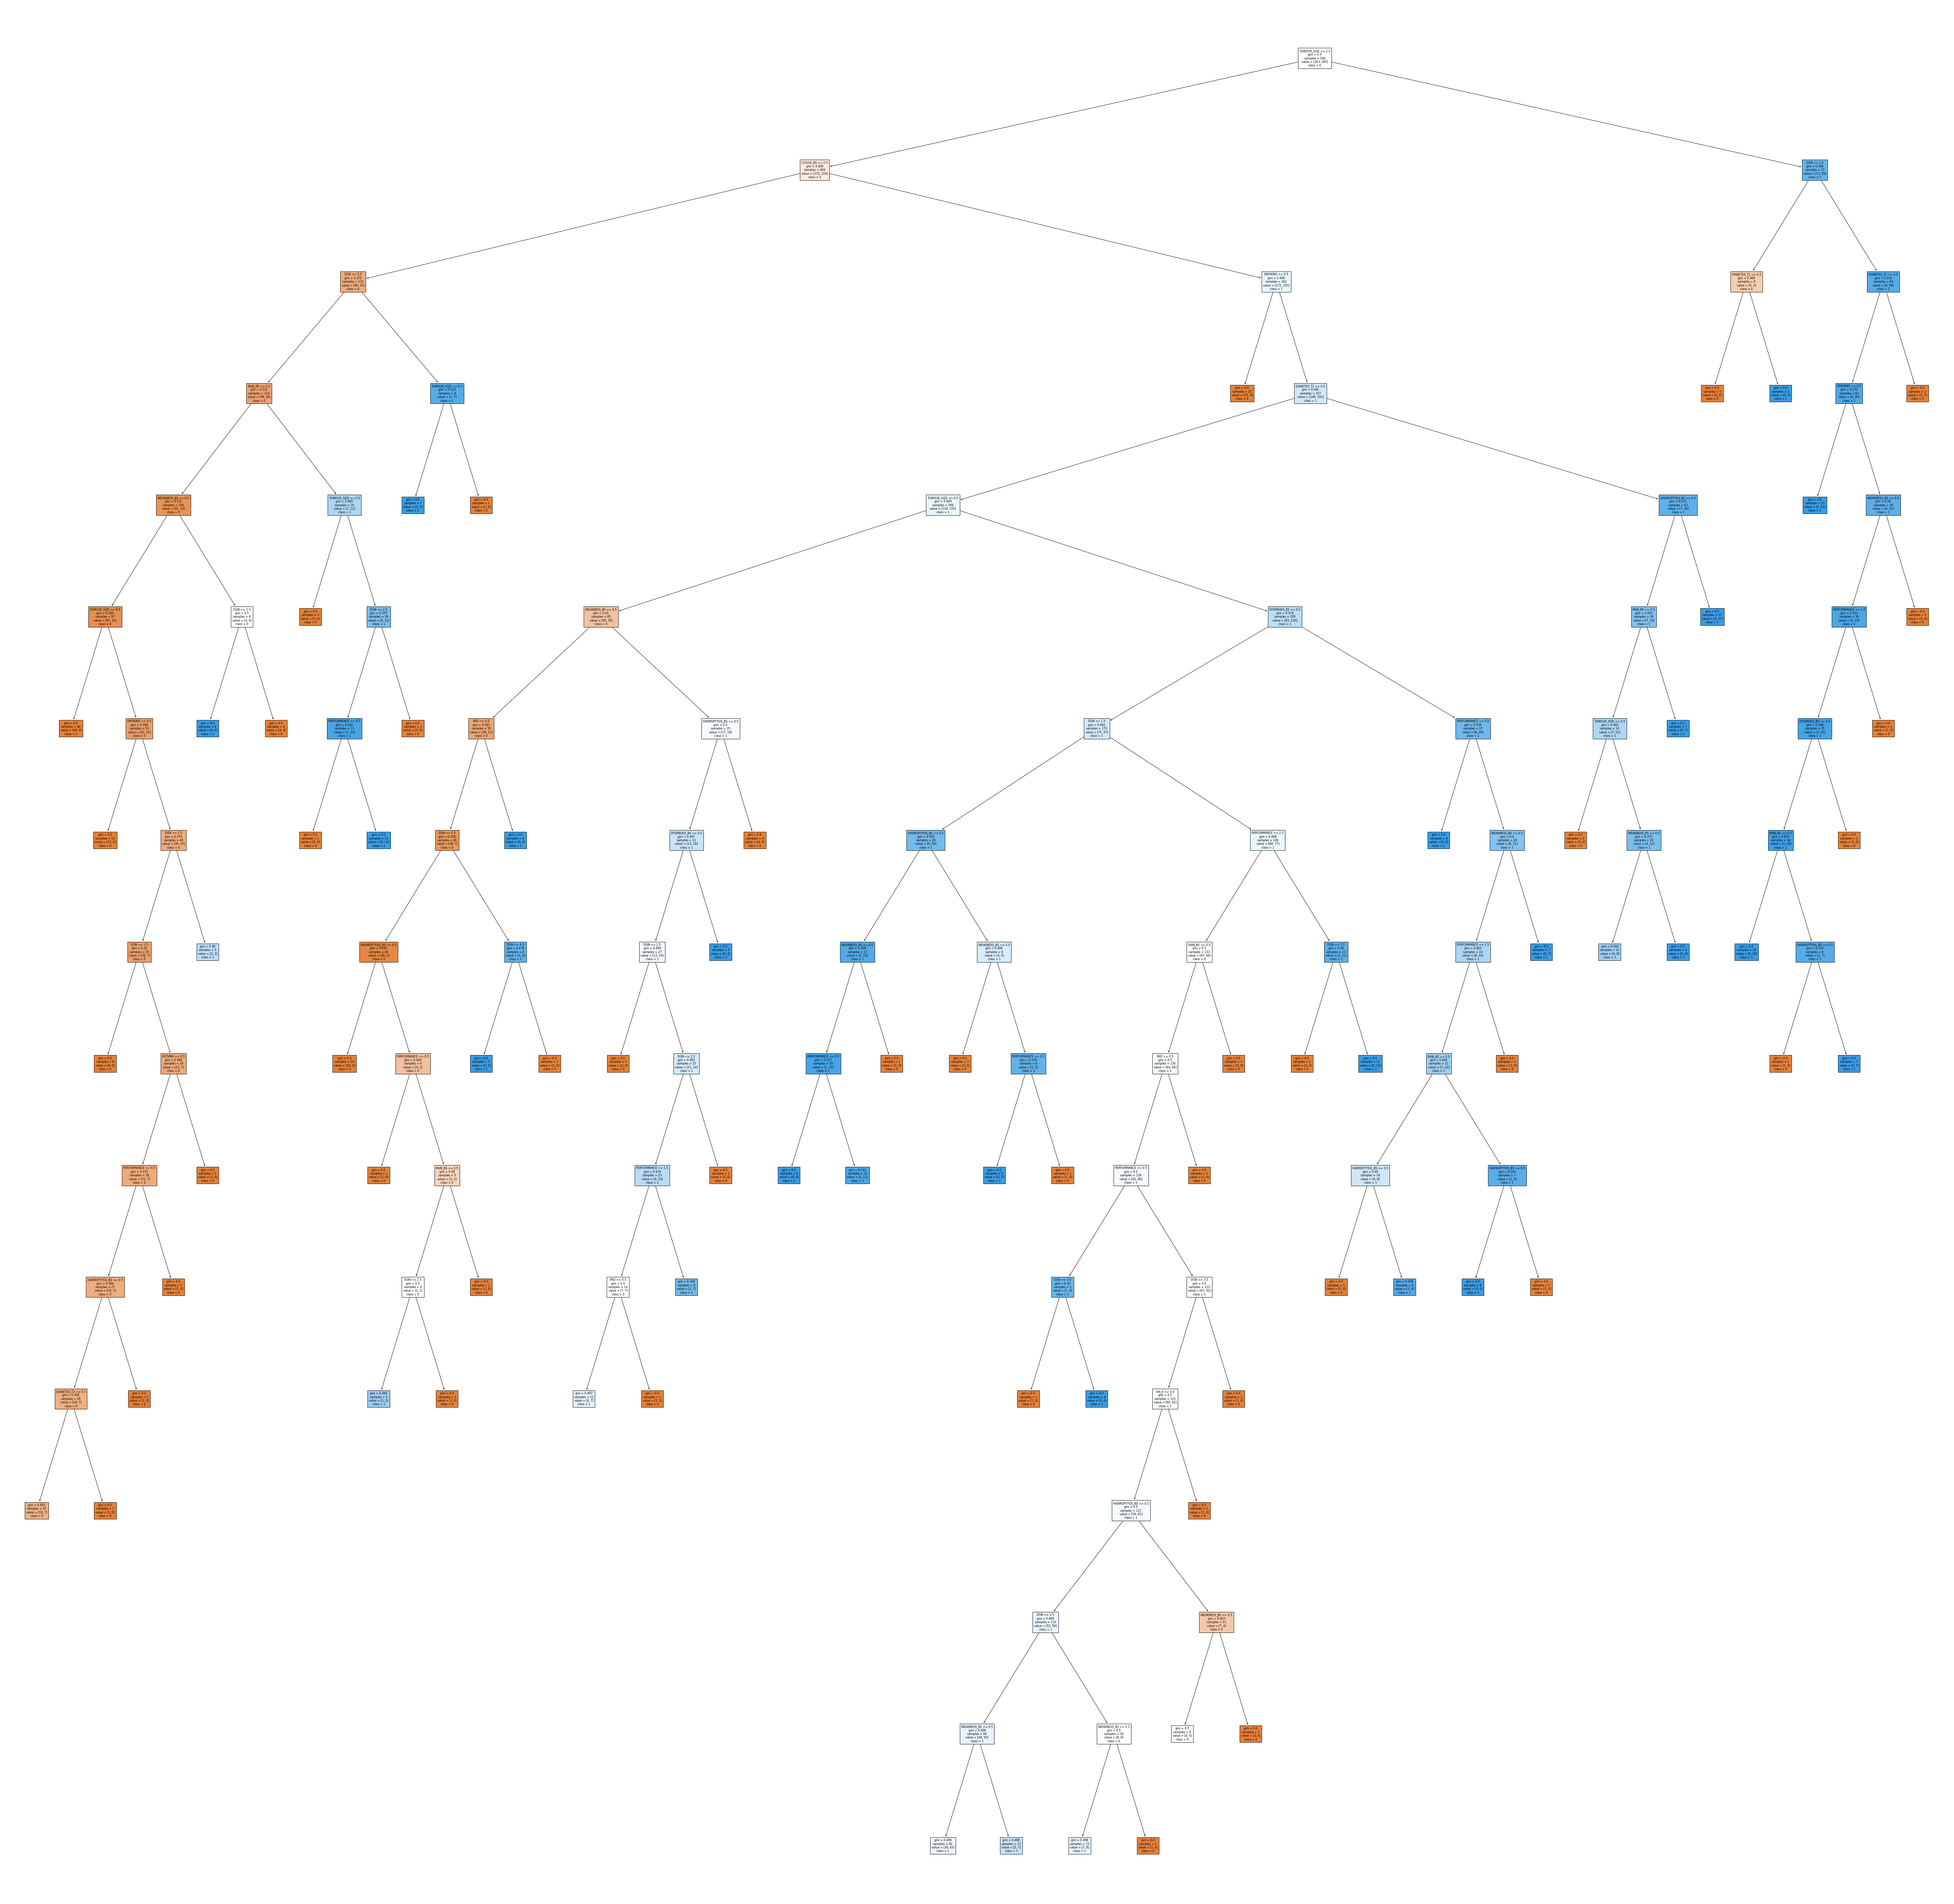

In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
_ = plot_tree(dtree, 
                feature_names=X.columns,  
                class_names=['0', '1'],
                filled=True,
                fontsize=8
             )

### Hyper parameter tuning

### Determine the parameters that can be "tuned"

After reviewing these parameters (while also understanding something about DecisionTrees), we can identify the following parameters that could affect model fit. 

* criterion - used to guide data splits
* max_depth - Maximum number of levels in tree
* min_samples_split - Minimum number of samples required to split a node
* min_samples_leaf - Minimum number of samples required at each leaf node
* max_leaf_nodes - Grow trees with max_leaf_nodes in best-first fashion
* min_impurity_decrease - A node will be split if this split induces a decrease 




### Predicton with KNN

In [80]:
from sklearn.metrics import make_scorer
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,21,2)),
    'metric': ['euclidean'],
    'weights':['uniform','distance']
}

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=recall_score_weighted,
                          n_jobs=-1,error_score='raise')  # n_jobs=-1 will utilize all available CPUs 

best_grid_search_model=gridSearch.fit(train_X, train_y)
Y_predict=gridSearch.predict(test_X)

print("Recall", 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Recall score:  0.7915100250626566
parameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


### Prediction with Decision Tree




This section demonstrates how to refine the performance of a decision tree using hyperparameter tuning techniques. 

This section doesn't duplicate the data loading, cleaning, and splitting of the first section. This section shows how to create and test a random forest classifier using best_random_search_modelCV and best_grid_search_modelCV techniques. 

Both best_random_search_modelCV and best_grid_search_modelCV test different model parameters. These help to determine the parameters that produce the best performing model.

In [81]:
from sklearn.metrics import make_scorer

dtree=DecisionTreeClassifier(random_state=5)
_ = dtree.fit(train_X, train_y)

y_pred = dtree.predict(test_X)

param_grid = {
    'max_depth': [2,5,10,20,50],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=5), 
                                    scoring=recall_score_weighted, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)

print('Recall', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Recall score:  0.7986842105263159
parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


## Prediction with RandomForest

Supervised machine learning algorithms like random forest are frequently employed in classification and regression issues. On various samples, it constructs decision trees and uses their average for classification and majority vote for regression.

The Random Forest Algorithm's ability to handle data sets with both continuous variables, as in regression, and categorical variables, as in classification, is one of its most crucial qualities. In terms of classification issues, it delivers superior outcomes.

Like all our classifiers, RandomeForestClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* n_estimators: The number of trees in the forsest
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is 100.  
* max_depth: The maximum depth per tree. 
    - Deeper trees might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None, which allows the tree to grow without constraint.
* remaining tuning parameters similar to DecisionTree and covered last class.

In [82]:
from sklearn.metrics import make_scorer

rforest = RandomForestClassifier(random_state=5)
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(test_X)

param_grid = {
    'max_depth': [2,5,10,20,50],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'min_samples_split': [5, 8, 12, 18, 24],
    'bootstrap': [True,False]
}

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=5), 
                                    scoring = recall_score_weighted, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)


print('Recall', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)



Recall score:  0.8126879699248122
parameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


## Prediction with Gradient Boost

Like all our classifiers, GradientBoostingClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* Other tuning parameters similar to DecisionTree's and were covered last class.

In [83]:
from sklearn.metrics import make_scorer

gboost = GradientBoostingClassifier(random_state=5)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(test_X)

param_grid = {
    'max_depth': [2,5,10,20,50],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt'],
}

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=5), 
                                    scoring=recall_score_weighted, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)

print('Recall','score',best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Recall score 0.8074561403508772
parameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2}


## Prediction with ADABoost

Like all our classifiers, ADABoostClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.

In [84]:
from sklearn.metrics import make_scorer 
aboost = AdaBoostClassifier(random_state=5)
_ = aboost.fit(train_X, train_y)
y_pred = aboost.predict(test_X)

param_grid = {
    'n_estimators': [3,5,10,20],
    'learning_rate': [0.1, 0.01, 0.05],
}

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=5), 
                                    scoring=recall_score_weighted, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)

_ = best_grid_search_model.fit(train_X, train_y)

print('Recall ','score',best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Recall  score 0.6360588972431078
parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


### Prediction with XGBoost

Like all our classifiers, XGBoost has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is 6.
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree. 
    - It might improve overfitting.
    - The value must be between 0 and 1. Default is 1.
* subsample: Represents the fraction of observations to be sampled for each tree. 
    - A lower values prevent overfitting but might lead to under-fitting.
    - The value must be between 0 and 1. Default is 1.

In [85]:
xgboost = XGBClassifier(random_state=3)
_ = xgboost.fit(train_X, train_y)
y_pred = xgboost.predict(test_X)



from sklearn.metrics import make_scorer

param_grid = { 
    'max_depth': range(2,10,1),
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': range(40,220,40)
           
              }
scorer = make_scorer(recall_score, average = 'weighted')
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=3),scoring=scorer, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print('Recall', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Recall score:  0.7773809523809524
parameters:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}


### Hyperparameter Tuning for LogisticRegression

Logistic regression has very few parameters that are generally used for tuning.
  - See official documentation on sklearn logistic regression parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- You can see useful differences in performance or convergence with different solvers (solver).
    - Remember class when I described gradient descent? This is a process to identify the minimum of a loss function. The solve function parameter sets the method through which logistic regression will solve this problem of minimizing errors.
    - solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

- Regularization (penalty) can sometimes be helpful.
    - Regularization can be used to avoid overfitting. 
      - Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. 
    - penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
      - Note: not all solvers support all regularization terms.
        - ‘newton-cg’ - [‘l2’, ‘none’]
        - ‘lbfgs’ - [‘l2’, ‘none’]
        - ‘liblinear’ - [‘l1’, ‘l2’]
        - ‘sag’ - [‘l2’, ‘none’]
        - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

- The C parameter controls the penality strength, which can also be effective.
    - C in [100, 10, 1.0, 0.1, 0.01]




In [86]:
logClassifier=LogisticRegression(random_state=1) # Create the model

_ = logClassifier.fit(train_X,train_y)# fit the model to training data. 
#NOTE: underscore is a dummy variable that is useed to suppress output

In [87]:
pd.DataFrame({"Predicted":logClassifier.predict(test_X),"Actual":test_Y})

,Predicted,Actual
207,0,0
326,1,0
31,0,0
377,0,0
246,0,0
...,...,...
23,0,0
13,1,1
61,1,0
283,0,0


In [88]:
THRESHOLD = 0.25
y_pred_dthreshold25 = np.where(logClassifier.predict_proba(test_X)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":y_pred_dthreshold25,"actual":test_Y})

,predicted,actual
207,1,0
326,1,0
31,1,0
377,1,0
246,1,0
...,...,...
23,0,0
13,1,1
61,1,0
283,1,0


In [89]:
y_pred = logClassifier.predict(test_X)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred)}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred)}")
print("***********************")

***********************
Recall Score:     0.4166666666666667
***********************
Accuracy Score:   0.6808510638297872
Precision Score:  0.24390243902439024
F1 Score:         0.30769230769230765
***********************


###  Hyperparameter Tuning for LogisticRegression

In [90]:
from sklearn.metrics import make_scorer

param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

recall_score_weighted = make_scorer(recall_score, average = 'weighted')
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring= recall_score_weighted, param_grid=param_grid, 
                                    cv=10, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(train_X, train_y)

print('Recall ','score',best_logClassifer.best_score_)
print('parameters: ', best_logClassifer.best_params_)

Recall  score 0.6643483709273184
parameters:  {'C': 0.1, 'max_iter': 500000, 'solver': 'newton-cg'}


### Prediction with Neural Networks

In [91]:
ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(train_X, train_y)
y_pred = ann.predict(test_X)


In [93]:
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       117
           1       0.23      0.29      0.25        24

    accuracy                           0.71       141
   macro avg       0.54      0.54      0.54       141
weighted avg       0.74      0.71      0.72       141




**Based on the models KNN, Decision Tree, Random Forest, Gradient Descent, XG Boost, Multi-Layer Perceptron and Logistic Regression, 
Random Forest Outperformed all of the models by considering the Recall metric -**

**1.Recall**

a.KNN - 79.1%              
    b.Decision Tree - 79.8%           
    c.Random Forest - 81.2%         
    d.Gradient Boost - 80.74%           
    e.ADA Boost - 63.6%               
    f.XG Boost - 77.7%              
    g.LOGISTIC Regression - 66.4%             
    h.MULTI LAYER Perception - 71%          
**Based on the above metrics described, we concluded that Random Forest model fits better than all the above models to the thoraric surgery data set.**



#### We have used multiple classifiers on this data set such as Hyper parameter tuned KNN, Decision Tree, Random Forest, Gradient Descent, XG Boost, and Multi-Layer Perceptron.



#### Based on the results, we can see that the Random Forest classifier outperformed all of the models by considering Recall as our main metric.